# **TASK-2** - Demand Forecasting
---
- You are expected to create an analysis and demand prediction based on the dataset on the next 6 months
- Ensure that there’s some analysis and insight on why it’s happening and call-to-action on what should we do to make it better
- share what model you used, how you evaluated your models, how confident are you with the models and 
- what are the caveat/issues you faced during the analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [18]:
df = pd.read_csv('retail_sales.csv')
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,83.4,Success
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,100.8,Success
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,30.0,Success


- grouping data jadi perbulan
- ubah tipe data tanggal menjadi datetime

In [19]:
retail = df.groupby(['year', 'month']).agg(
    total_sales=('sales', 'sum')
).reset_index()

retail['year-month'] = retail['year'].astype(str) + '-' + retail['month'].astype(str).str.zfill(2)

retail = retail[['year-month', 'total_sales']]

retail['year-month'] = pd.to_datetime(retail['year-month'])

retail.set_index('year-month', inplace=True)
retail

,total_sales
year-month,
2009-12-01,798732.03
2010-01-01,612605.50
2010-02-01,538126.69
2010-03-01,762148.53
2010-04-01,646824.06
2010-05-01,643835.64
2010-06-01,697714.72
2010-07-01,633836.06
2010-08-01,674842.89


- visualisasi untuk melihat pola penjualan bulanan

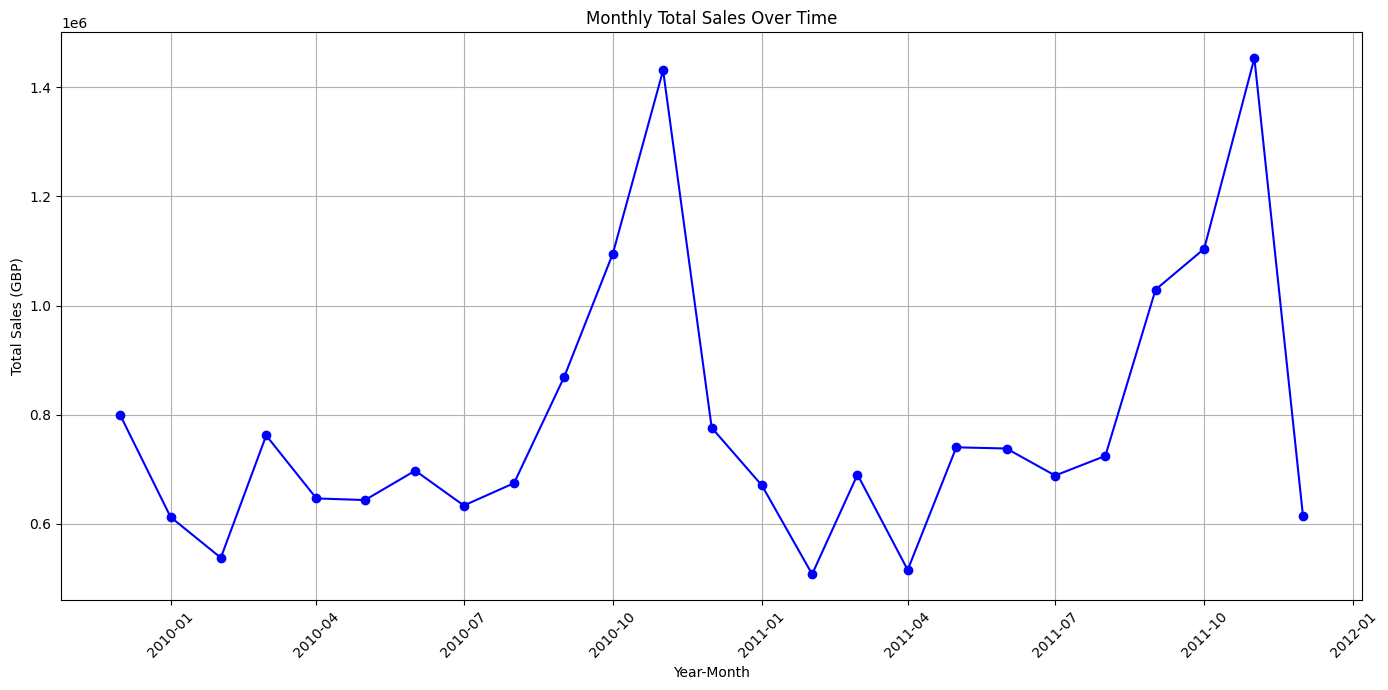

In [20]:
retail.index = pd.to_datetime(retail.index)

plt.figure(figsize=(14, 7))
plt.plot(retail.index, retail['total_sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (GBP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- A seasonal pattern is evident from the monthly sales chart, with an increase in August, peaking in November, and a decline starting towards December and continuing through February.
- Therefore, we will use the SARIMA model, which is more suited for handling seasonal patterns.

# SARIMA

In [21]:
split_index = int(len(retail) * 0.8)
train = retail[:split_index]
test = retail[split_index:]

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (8) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=212.721, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=205.571, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=209.539, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=210.153, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=204.643, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=207.567, Time=0.83 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=207.567, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=209.567, Time=0.22 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=207.545, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=208.153, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=208.300, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 2.665 seconds


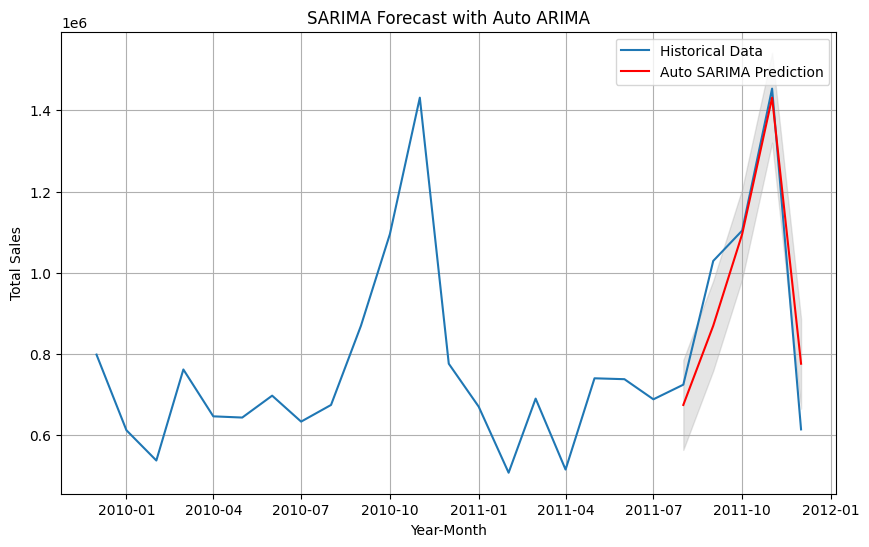

Auto SARIMA RMSE: 104517.0391019549
Auto SARIMA MAPE: 10.196473000821484%


In [22]:
train = train.copy().astype(float)
test = test.copy().astype(float)

autoarima_model = auto_arima(train['total_sales'], seasonal=True, m=12, trace=True)
autoarima_model.fit(train['total_sales'])

n_periods = len(test)
forecast, conf_int = autoarima_model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='MS')

autoarima_forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Prediction'])
autoarima_conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower', 'Upper'])

plt.figure(figsize=(10, 6)) 
plt.plot(retail['total_sales'], label='Historical Data')
plt.plot(autoarima_forecast_df['Prediction'], label='Auto SARIMA Prediction', color='red')
plt.fill_between(autoarima_conf_int_df.index, autoarima_conf_int_df['Lower'], autoarima_conf_int_df['Upper'], color='gray', alpha=0.2)
plt.title('SARIMA Forecast with Auto ARIMA')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.grid(True)  
plt.show()

forecast_aligned = autoarima_forecast_df['Prediction'].reindex(test.index)
autoarima_rmse = np.sqrt(mean_squared_error(test['total_sales'], forecast_aligned))
autoarima_mape = np.mean(np.abs((test['total_sales'] - forecast_aligned) / test['total_sales'])) * 100

print(f'Auto SARIMA RMSE: {autoarima_rmse}')
print(f'Auto SARIMA MAPE: {autoarima_mape}%')

In [23]:
full_data = pd.concat([train, test])

order = (0, 0, 0)
seasonal_order = (0, 1, 0, 12)

sarima_model = SARIMAX(full_data['total_sales'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

n_periods = 6
forecast = sarima_result.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean
confidence_int = forecast.conf_int()

future_dates = pd.date_range(start=full_data.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')
future_forecast = pd.DataFrame(forecast_mean.values, index=future_dates, columns=['Prediction'])
conf_int = pd.DataFrame(confidence_int.values, index=future_dates, columns=['Lower CI', 'Upper CI'])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
future_forecast

,Prediction
2012-01-01,670639.46
2012-02-01,508065.09
2012-03-01,690466.82
2012-04-01,515863.08
2012-05-01,740436.14
2012-06-01,738233.99


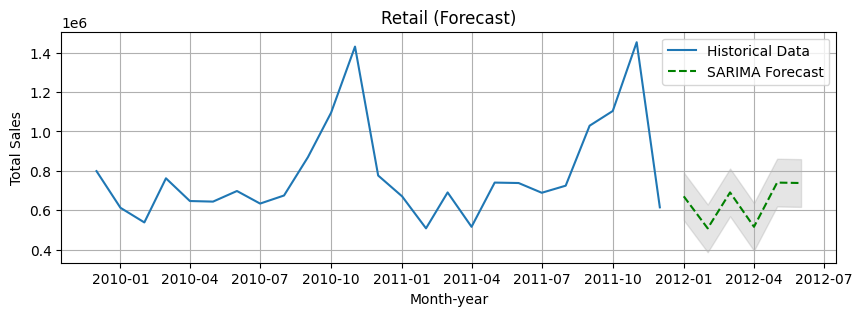

In [25]:
plt.figure(figsize=(10, 3))
plt.plot(full_data['total_sales'], label='Historical Data')
plt.plot(future_forecast, label='SARIMA Forecast', linestyle='--', color='green')
plt.fill_between(conf_int.index, conf_int['Lower CI'], conf_int['Upper CI'], color='gray', alpha=0.2)
plt.title('Retail (Forecast)')
plt.xlabel('Month-year')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [26]:
new_data = pd.concat([full_data.tail(1), future_forecast.rename(columns={'Prediction' :'total_sales'})])
new_data

,total_sales
2011-12-01,614695.96
2012-01-01,670639.46
2012-02-01,508065.09
2012-03-01,690466.82
2012-04-01,515863.08
2012-05-01,740436.14
2012-06-01,738233.99


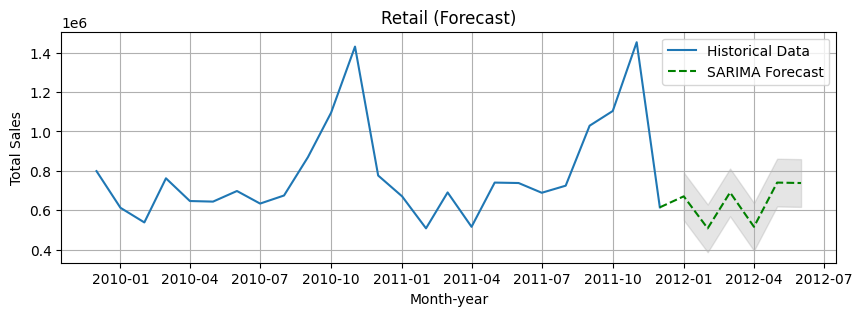

In [27]:
plt.figure(figsize=(10, 3))
plt.plot(full_data['total_sales'], label='Historical Data')
plt.plot(new_data, label='SARIMA Forecast', linestyle='--', color='green')
plt.fill_between(conf_int.index, conf_int['Lower CI'], conf_int['Upper CI'], color='gray', alpha=0.2)
plt.title('Retail (Forecast)')
plt.xlabel('Month-year')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **Product Stock-up**

## **Test - Product_1**

In [28]:
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,83.4,Success
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,100.8,Success
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,30.0,Success


In [29]:
best_prod =df.groupby('product_description')['quantity'].sum().reset_index()
best_prod.columns = ['product_description', 'total_qty_sold']
best_prod = best_prod.sort_values(by='total_qty_sold', ascending=False)
best_prod

,product_description,total_qty_sold
5294,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106250
5172,WHITE HANGING HEART T-LIGHT HOLDER,94663
3194,"PAPER CRAFT , LITTLE BIRDIE",80995
305,ASSORTED COLOUR BIRD ORNAMENT,80090
2756,MEDIUM CERAMIC TOP STORAGE JAR,78033
...,...,...
1660,FEATHER HEART LIGHTS,1
1622,"F.FAIRY,CANDLE IN GLASS,LILY/VALLEY",1
1576,ENGLISH ROSE DESIGN SHOPPING BAG,1
1573,ENGLISH ROSE DESIGN KITCHEN APRON,1


In [30]:
df1 = df[df['product_description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
df1

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
1218,489561,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-01 12:57:00,0.21,14654.0,United Kingdom,2009,12,1,12,10.08,Success
3369,489723,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2009-12-02 10:58:00,0.18,14299.0,United Kingdom,2009,12,2,10,51.84,Success
3984,489802,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,3,2009-12-02 12:32:00,0.21,15581.0,United Kingdom,2009,12,2,12,0.63,Success
4315,489816,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-02 13:20:00,0.21,16086.0,United Kingdom,2009,12,2,13,10.08,Success
4326,489819,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96,2009-12-02 13:23:00,0.21,14739.0,United Kingdom,2009,12,2,13,20.16,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999233,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 15:02:00,0.29,12615.0,France,2011,12,7,15,13.92,Success
1002597,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08 13:46:00,0.29,13510.0,United Kingdom,2011,12,8,13,13.92,Success
1003176,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08 15:03:00,0.21,15484.0,United Kingdom,2011,12,8,15,60.48,Success
1004669,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-09 08:59:00,0.29,17364.0,United Kingdom,2011,12,9,8,13.92,Success


In [31]:
prod1 = df1.groupby(['year', 'month']).agg(
    total_quantity=('quantity', 'sum')
).reset_index()

prod1['year-month'] = prod1['year'].astype(str) + '-' + prod1['month'].astype(str).str.zfill(2)

prod1 = prod1[['year-month', 'total_quantity']]

prod1['year-month'] = pd.to_datetime(prod1['year-month'])

prod1.set_index('year-month', inplace=True)

prod1

,total_quantity
year-month,
2009-12-01,2703
2010-01-01,1443
2010-02-01,2400
2010-03-01,4563
2010-04-01,3696
2010-05-01,3232
2010-06-01,5467
2010-07-01,3015
2010-08-01,5009


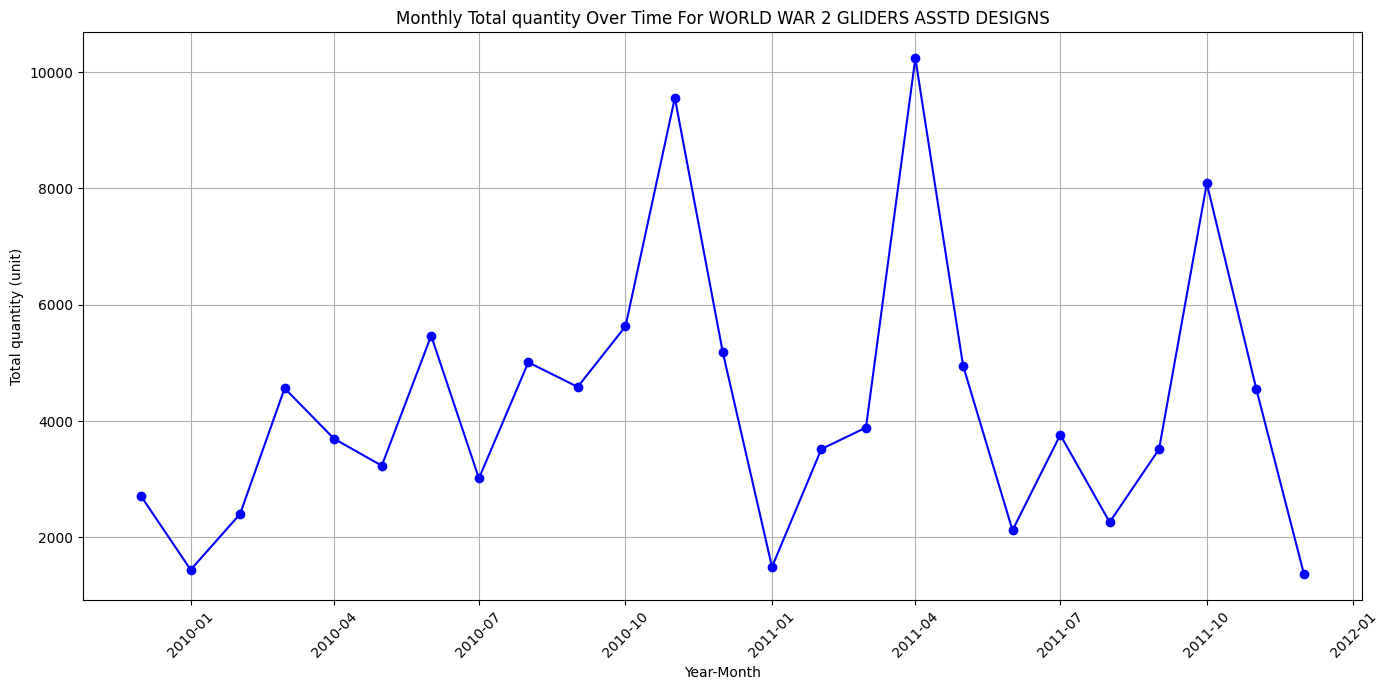

In [32]:
prod1.index = pd.to_datetime(prod1.index)

plt.figure(figsize=(14, 7))
plt.plot(prod1.index, prod1['total_quantity'], marker='o', linestyle='-', color='b')
plt.title('Monthly Total quantity Over Time For WORLD WAR 2 GLIDERS ASSTD DESIGNS')
plt.xlabel('Year-Month')
plt.ylabel('Total quantity (unit)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

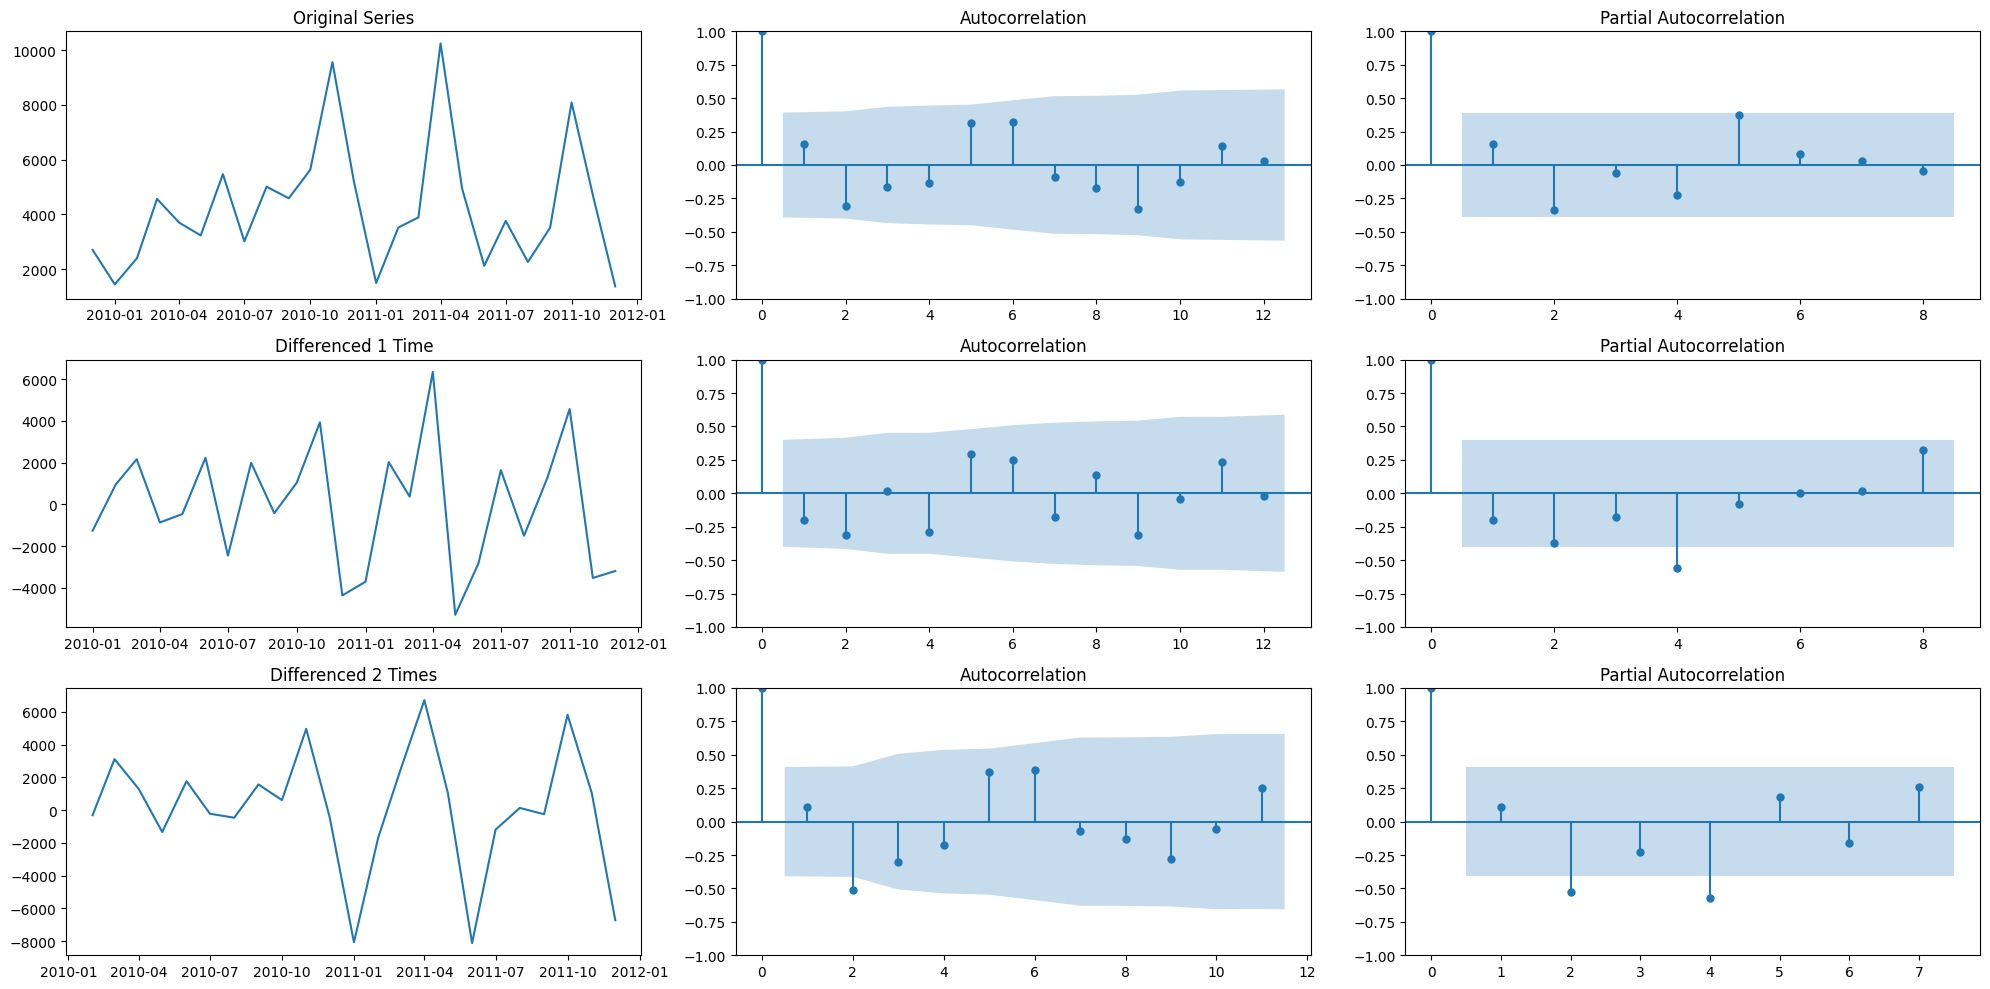

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))


axes[0, 0].plot(prod1['total_quantity'])
axes[0, 0].set_title('Original Series')


plot_acf(prod1['total_quantity'], ax=axes[0, 1])
plot_pacf(prod1['total_quantity'], ax=axes[0, 2], lags=8)


diff_1 = prod1['total_quantity'].diff(1).dropna()
axes[1, 0].plot(diff_1)
axes[1, 0].set_title('Differenced 1 Time')


plot_acf(diff_1, ax=axes[1, 1])
plot_pacf(diff_1, ax=axes[1, 2], lags=8)


diff_2 = prod1['total_quantity'].diff(2).dropna()
axes[2, 0].plot(diff_2)
axes[2, 0].set_title('Differenced 2 Times')

plot_acf(diff_2, ax=axes[2, 1])
plot_pacf(diff_2, ax=axes[2, 2], lags=7)

plt.tight_layout()
plt.show()

- dilihat dari plot diatas, time series cukup stationer setelah di differencing 1x
- Berdasarkan plot ACF dan PACF, ordo terbaik adalah 1 untuk AR - 0 untuk MA
- Maka model yang akan dicoba adalah ARIMA (1,1,0) dan ARIMA (0,1,1)

In [49]:
model = ARIMA(prod1['total_quantity'], order = (0,1,1))
model_fit = model.fit()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
forecast_length = 2
forecast_result = model_fit.forecast(forecast_length)
prod_batas = model_fit.get_forecast(forecast_length).conf_int()
prod_batas

,lower total_quantity,upper total_quantity
2012-01-01,234.638073,5465.937434
2012-02-01,194.717236,5515.480007


In [68]:
forecast_result = pd.DataFrame(forecast_result)
forecast_result = forecast_result.rename(columns={'predicted_mean' : 'total_quantity'})
forecast_result

,total_quantity
2012-01-01,2850.287754
2012-02-01,2855.098621


In [60]:
prod_stock = pd.concat([prod1.tail(1), forecast_result])
prod_stock

,total_quantity
2011-12-01,1367.000000
2012-01-01,4132.247915
2012-02-01,4132.247915


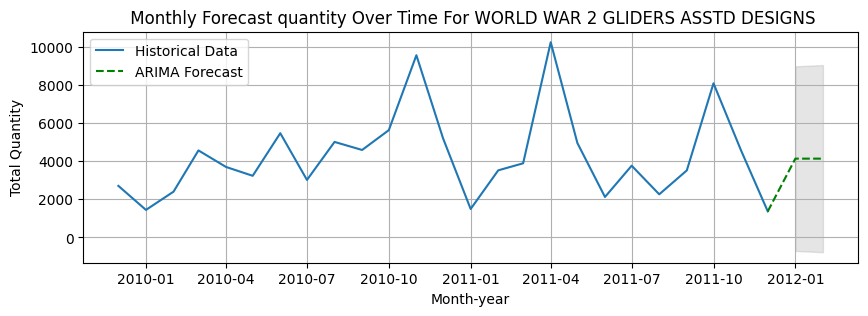

In [61]:
plt.figure(figsize=(10, 3))
plt.plot(prod1['total_quantity'], label='Historical Data')
plt.plot(prod_stock, label='ARIMA Forecast', linestyle='--', color='green')
plt.fill_between(prod_batas.index, prod_batas['lower total_quantity'], prod_batas['upper total_quantity'], color='gray', alpha=0.2)
plt.title(' Monthly Forecast quantity Over Time For WORLD WAR 2 GLIDERS ASSTD DESIGNS')
plt.xlabel('Month-year')
plt.ylabel('Total Quantity')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## **Test - Product_2**

In [75]:
df2 = df[df['product_description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
df2.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
101,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom,2009,12,1,9,17.70,Success
145,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom,2009,12,1,10,81.60,Success
245,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom,2009,12,1,10,163.20,Success
334,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom,2009,12,1,11,2.95,Success
360,489519,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 11:37:00,2.55,17700.0,United Kingdom,2009,12,1,11,81.60,Success


In [76]:
prod2 = df2.groupby(['year', 'month']).agg(
    total_quantity=('quantity', 'sum')
).reset_index()

prod2['year-month'] = prod2['year'].astype(str) + '-' + prod2['month'].astype(str).str.zfill(2)

prod2 = prod2[['year-month', 'total_quantity']]

prod2['year-month'] = pd.to_datetime(prod2['year-month'])

prod2.set_index('year-month', inplace=True)

prod2

,total_quantity
year-month,
2009-12-01,6406
2010-01-01,5484
2010-02-01,2911
2010-03-01,5066
2010-04-01,3697
2010-05-01,4430
2010-06-01,4357
2010-07-01,4039
2010-08-01,4729


C:\Users\User\AppData\Local\Temp\ipykernel_15224\1177405581.py:10: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


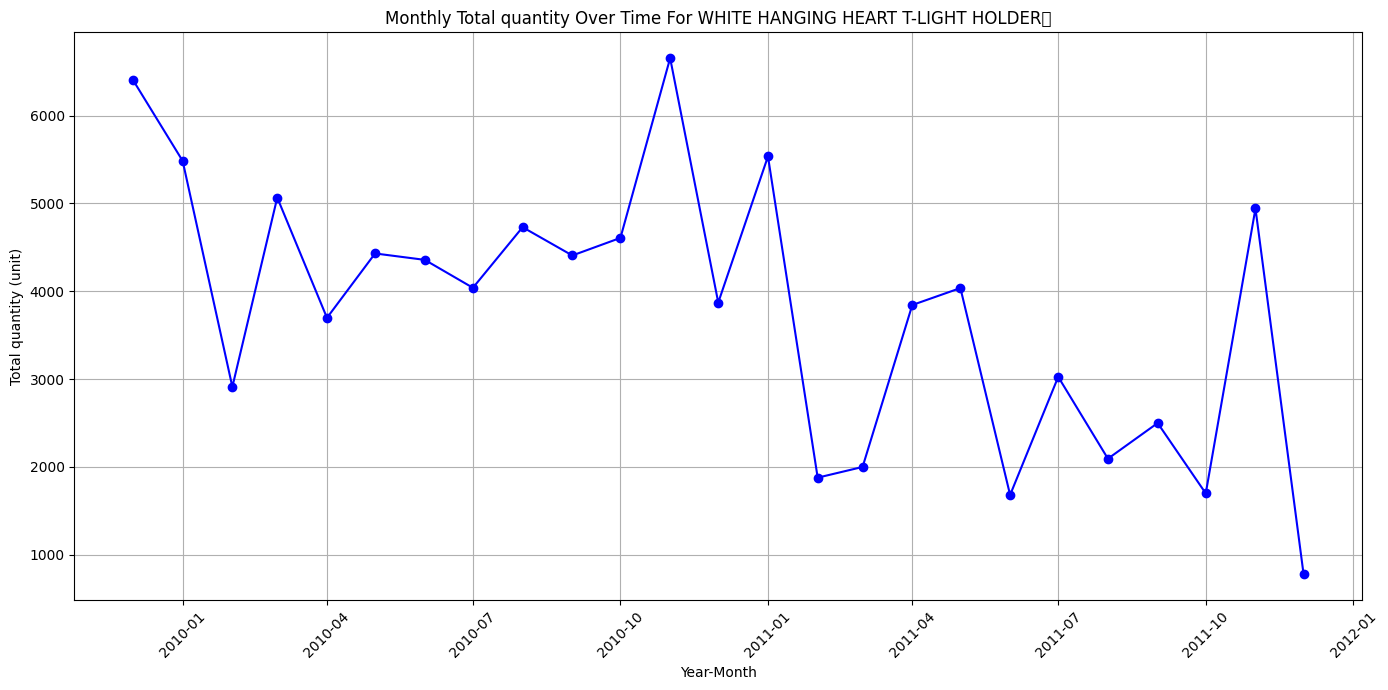

In [77]:
prod2.index = pd.to_datetime(prod2.index)

plt.figure(figsize=(14, 7))
plt.plot(prod2.index, prod2['total_quantity'], marker='o', linestyle='-', color='b')
plt.title('Monthly Total quantity Over Time For WHITE HANGING HEART T-LIGHT HOLDER	')
plt.xlabel('Year-Month')
plt.ylabel('Total quantity (unit)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

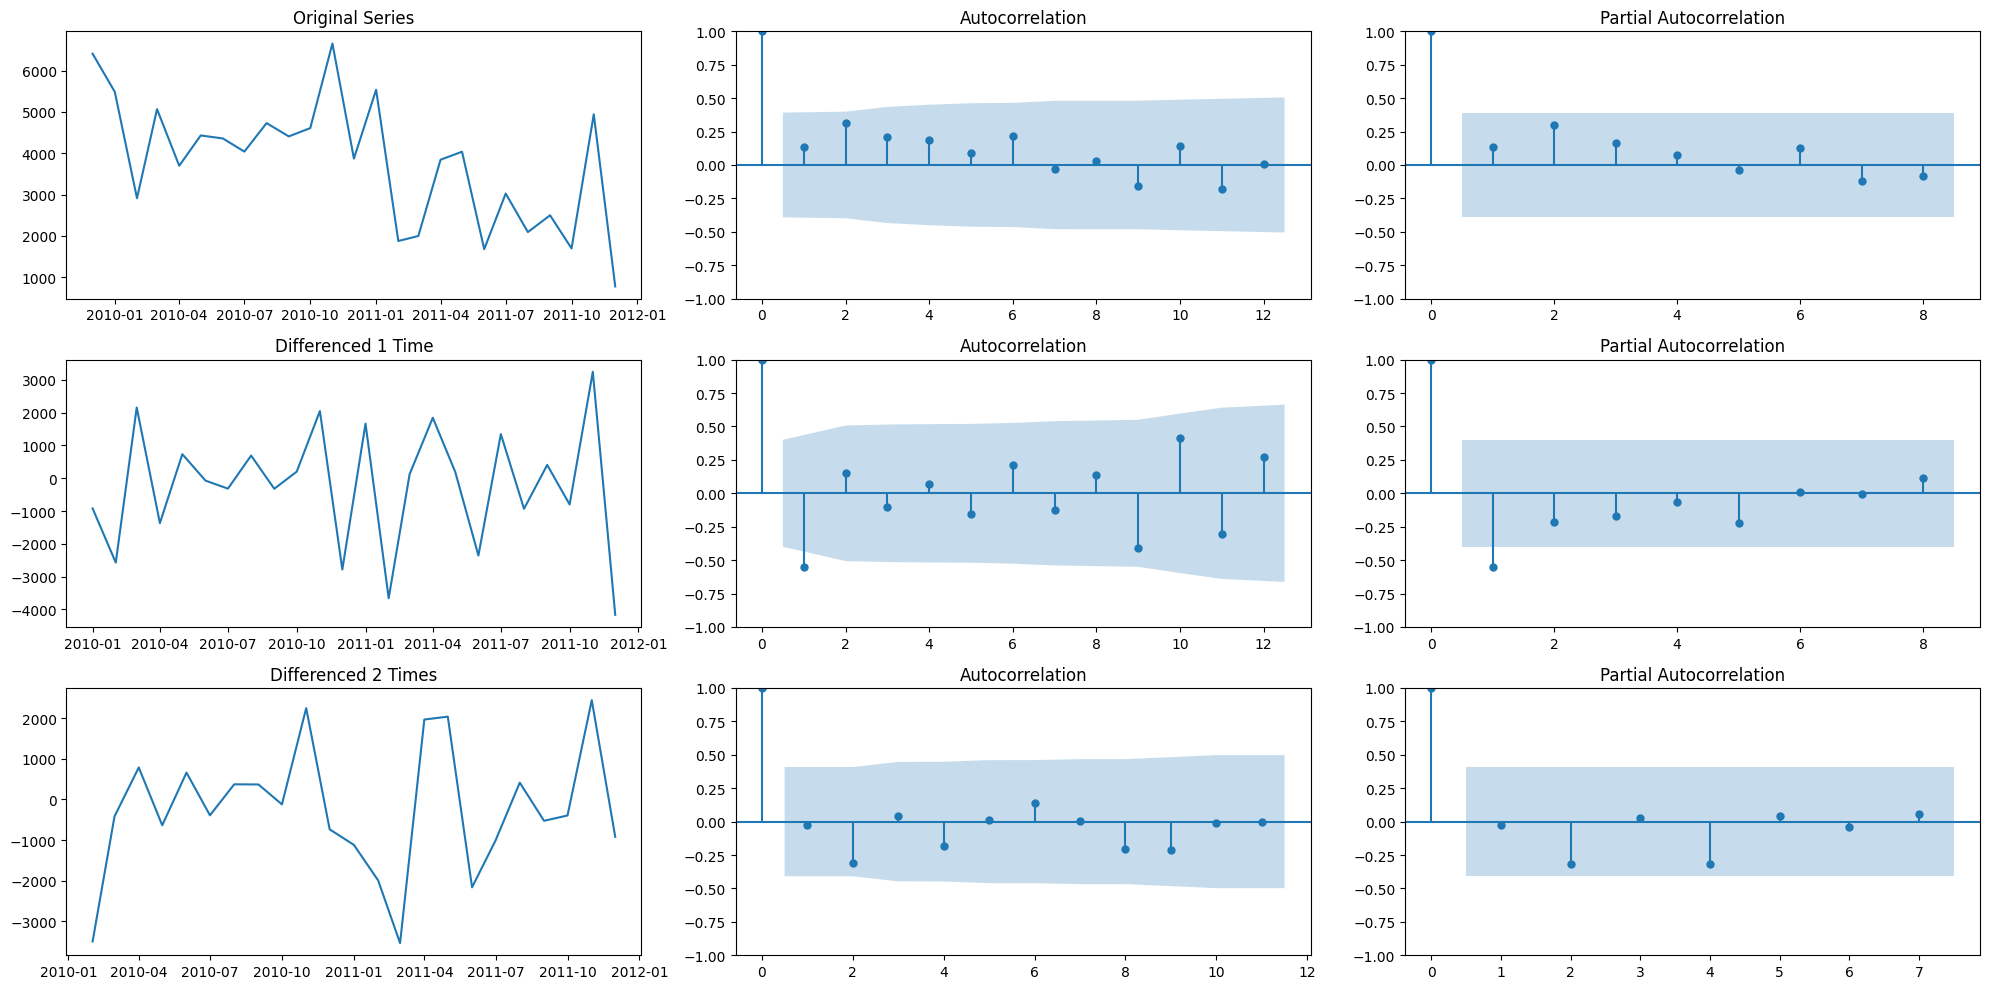

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

axes[0, 0].plot(prod2['total_quantity'])
axes[0, 0].set_title('Original Series')


plot_acf(prod2['total_quantity'], ax=axes[0, 1])
plot_pacf(prod2['total_quantity'], ax=axes[0, 2], lags=8)

diff_1 = prod2['total_quantity'].diff(1).dropna()
axes[1, 0].plot(diff_1)
axes[1, 0].set_title('Differenced 1 Time')

plot_acf(diff_1, ax=axes[1, 1])
plot_pacf(diff_1, ax=axes[1, 2], lags=8)


diff_2 = prod2['total_quantity'].diff(2).dropna()
axes[2, 0].plot(diff_2)
axes[2, 0].set_title('Differenced 2 Times')

plot_acf(diff_2, ax=axes[2, 1])
plot_pacf(diff_2, ax=axes[2, 2], lags=7)

plt.tight_layout()
plt.show()

- dilihat dari plot diatas, time series cukup stationer setelah di differencing 1x
- Maka model yang akan dicoba adalah ARIMA (2,1,0) dan ARIMA (0,1,2)

In [79]:
model2 = ARIMA(prod2['total_quantity'], order = (2,1,0))
model_fit2 = model2.fit()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [80]:
forecast_length = 2
forecast_result2 = model_fit2.forecast(forecast_length)
prod_batas2 = model_fit2.get_forecast(forecast_length).conf_int()
prod_batas2

,lower total_quantity,upper total_quantity
2012-01-01,234.638073,5465.937434
2012-02-01,194.717236,5515.480007


In [81]:

forecast_result2 = pd.DataFrame(forecast_result2)
forecast_result2 = forecast_result2.rename(columns={'predicted_mean' : 'total_quantity'})
forecast_result2

,total_quantity
2012-01-01,2850.287754
2012-02-01,2855.098621


In [82]:
prod_stock2 = pd.concat([prod2.tail(1), forecast_result2])
prod_stock2

,total_quantity
2011-12-01,778.000000
2012-01-01,2850.287754
2012-02-01,2855.098621


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


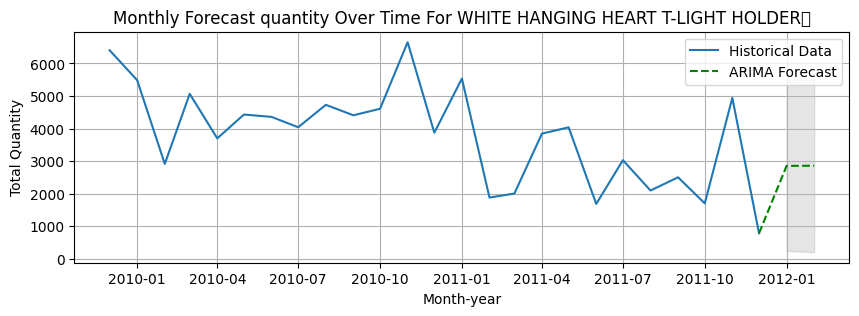

In [83]:

plt.figure(figsize=(10, 3))
plt.plot(prod2['total_quantity'], label='Historical Data')
plt.plot(prod_stock2, label='ARIMA Forecast', linestyle='--', color='green')
plt.fill_between(prod_batas2.index, prod_batas2['lower total_quantity'], prod_batas2['upper total_quantity'], color='gray', alpha=0.2)
plt.title('Monthly Forecast quantity Over Time For WHITE HANGING HEART T-LIGHT HOLDER	')
plt.xlabel('Month-year')
plt.ylabel('Total Quantity')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**KEY INSIGHT**

1. You are expected to create an analysis and demand prediction based on the dataset on the next 6 months 
- Analyzing using the SARIMA model because the data exhibits a seasonal pattern, SARIMA becomes the optimal model for seasonal patterns.
- The analysis results depict the forecast for the next 6 months as follows:

2012-01-01	670639.46 GBP
2012-02-01	508065.09 GBP

2012-03-01	690466.82 GBP

2012-04-01	515863.08 GBP

2012-05-01	740436.14 GBP

2012-06-01	738233.99 GBP

2. Ensure that there’s some analysis and insight on why it’s happening and call-to-action on what should we do to make it better
- This occurs due to the consideration of Autoregressive, where past values are combined to predict future values using regression.
- It also takes into account Moving Average (MA) to consider errors from past predictions to forecast current values.

3. share what model you used, how you evaluated your models, how confident are you with the models and 
- The model I used is SARIMA.
- Evaluation metrics include RMSE: 104517.0391019549 & MAPE: 10.19%.
- I am quite confident in the model as the MAPE error is 10%.

4. what are the caveat/issues you faced during the analysis
- The model only considers one variable and does not take into account other factors (non-exogenous).

#### **Product need to be stock-up**

- Out of all the products, there are 2 that have consistently sold in high numbers over the past 2 years and are predicted to increase over the next 6 months.
- After performing a specific forecast for these 2 products, they are also predicted to experience an increase:

- For the product **WORLD WAR 2 GLIDERS ASSTD DESIGNS**:
  - **Month 1 of 2012**:
    - Upper bound: 234.638073
    - Lower bound: 5465.937434
  ---
  - **Month 2 of 2012**:
    - Upper bound: 194.717236
    - Lower bound: 5515.480007